In [1]:
%pwd

'/Users/mohammedarif/Desktop/github_repos/Portfolio'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv("housing.csv")

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
columns_inscope = [
'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
]

housing = housing[columns_inscope]
housing

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [6]:
#Q1
# lokking if any columns has na values -- > 'total_bedrooms'
housing.isna().any()

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [7]:
#Q2
from statistics import median
median(housing['population'])

1166.0

In [8]:
housing['population'].median()

np.float64(1166.0)

# Linear Regression on Housing Dataset

This notebook performs the following tasks:
1. **Data Preprocessing**: Handling missing values, scaling features, and preparing the dataset.
2. **Model Training**: Using linear regression with and without regularization.
3. **Evaluation**: Computing RMSE to evaluate model performance.
4. **Prediction**: Generating predictions based on the trained model.

## Functions Overview:
- `prepare_x`: Prepares the feature matrix (X) by handling missing values.
- `train_linear_regression`: Trains the linear regression model without regularization.
- `train_linear_regression_reg`: Trains the linear regression model with regularization.
- `rmse`: Computes the root mean squared error.
- `predict`: Makes predictions based on the learned model.


## Imports

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from typing import Tuple

## Setup

In [10]:
# Set display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Functions

In [11]:
def train_linear_regression(X: pd.DataFrame, y: pd.Series) -> Tuple[float, np.ndarray]:
    """
    Trains a linear regression model using the provided features and target.
    
    Args:
    X (pd.DataFrame): Feature matrix for training.
    y (pd.Series): Target variable for training.
    
    Returns:
    Tuple[float, np.ndarray]: Intercept (w_0) and weights (w) of the trained linear regression model.
    """
    ones = np.ones(X.shape[0])  # Add intercept
    X = np.c_[ones, X]  # Add intercept to feature matrix
    X_T_X_inv = np.linalg.inv(X.T.dot(X))  # Compute (X^T * X)^-1
    w = X_T_X_inv.dot(X.T).dot(y)  # Compute weights using normal equation
    return w[0], w[1:]  # Return intercept and weights


In [12]:
def train_linear_regression_reg(X: pd.DataFrame, y: pd.Series, r: float = 0.0) -> Tuple[float, np.ndarray]:
    """
    Trains a linear regression model with L2 regularization (Ridge regression).

    Args:
    X (pd.DataFrame): Feature matrix for training with shape (n_samples, n_features).
    y (pd.Series): Target variable for training with shape (n_samples,).
    r (float): Regularization parameter (lambda). Default is 0.0 for no regularization.

    Returns:
    Tuple[float, np.ndarray]: Intercept (w_0) and the coefficients (w) of the trained model.
    """
    ones = np.ones(X.shape[0])  # Add intercept term
    X = np.column_stack([ones, X])  # Stack ones to feature matrix

    XTX = X.T.dot(X)  # Compute X^T * X
    reg = r * np.eye(XTX.shape[0])  # Regularization matrix
    XTX = XTX + reg  # Add regularization

    XTX_inv = np.linalg.inv(XTX)  # Compute inverse
    w = XTX_inv.dot(X.T).dot(y)  # Calculate weights

    return w[0], w[1:]  # Return intercept and weights


In [13]:
def prepare_x(X: pd.DataFrame, fill_na_with: float = 0) -> pd.DataFrame:
    """
    Prepares the feature matrix X by filling missing values with the specified value and scaling features if necessary.
    
    Args:
    X (pd.DataFrame): Input feature matrix with missing values.
    fill_na_with (float): The value to fill missing entries with.
    
    Returns:
    pd.DataFrame: Processed feature matrix ready for model training.
    """
    X = X.fillna(fill_na_with)  # Fill missing values
    
    return X


In [14]:
def rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Computes the Root Mean Squared Error (RMSE) between actual and predicted values.
    
    Args:
    y_true (np.ndarray): Actual target values.
    y_pred (np.ndarray): Predicted target values.
    
    Returns:
    float: The RMSE value.
    """
    return np.sqrt(np.mean((y_true - y_pred) ** 2))


## loading the dataset

In [15]:
df = pd.read_csv("housing.csv")

## exploratory analysis

In [16]:
# check the size of the data
df.shape

(20640, 10)

In [17]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [18]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [19]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
# check if there are any missinng in any of the columns
print(df.isnull().sum())


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [21]:
# choosing the desiered columns for building the model
columns = [
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households", 
    "median_income",
    "median_house_value" # target feature
]

df = df[columns]

## shuffling & splitting the dataset (60/20/20)%

In [22]:
# splitting the dataset into trainig/validation and testing.
n = len(df)
idx = np.arange(n)

n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - (n_val+n_test)
np.random.seed(42)
np.random.shuffle(idx)


df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_test  = df_shuffled.iloc[n_train:n_train+n_test].copy()
df_val = df_shuffled.iloc[n_train+n_val:].copy()

In [23]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)

In [24]:
# preparing the target feature which we want to make predictons upon (median_house_value)

y_train_orig = df_train.median_house_value.values
y_test_orig = df_test.median_house_value.values
y_val_orig = df_val.median_house_value.values

 
"""
Normaization to avoid negative values and better reperenstation
y=log(1+y)

"""
y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)


'''
After extracting the target variable median_house_value, the next step is to delete this column from the training, validation, and test sets. This is important because the model should NOT use the target variable as an input feature.
'''
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [25]:
y_train[:5], y_val[:5], y_test[:5]

(array([10.77270764, 10.7320612 , 13.12236738, 12.29500343, 12.53537999]),
 array([10.98191414, 12.01854355, 11.84510995, 11.58525543, 11.58246086]),
 array([11.4414402 , 12.15162174, 12.74081302, 12.16055736, 12.58485491]))

In [26]:
# searching for a feature which has missing values within the trainign set
df_train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

## filling missing values

* filling the missing values with mean

<Axes: ylabel='Count'>

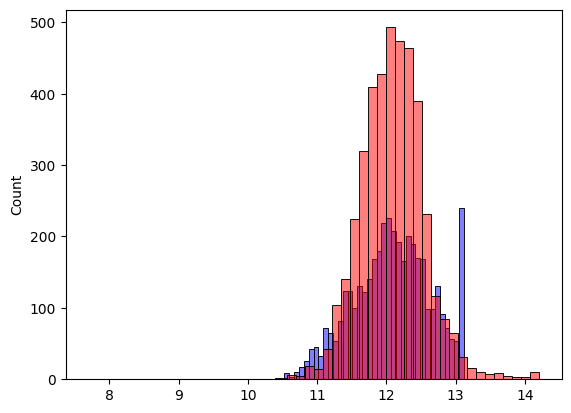

In [27]:
#filling with missing values with mean
mean = df_train.total_bedrooms.mean()
x_train = prepare_x(X = df_train,fill_na_with=mean)
x_val = prepare_x(X = df_val,fill_na_with = mean)
# finding the bias (intercept) and weights
w_0,w = train_linear_regression(x_train,y_train)

# performimng prediction on the validation set
y_pred = w_0 + x_val.dot(w)

# check for the predictor's error
rmse(y_val,y_pred)




sns.histplot(y_val,bins = 50,alpha = 0.5,color = 'blue')
sns.histplot(y_pred, bins =50, alpha=0.5, color = 'red')

* filling missing values with Zeros

<Axes: ylabel='Count'>

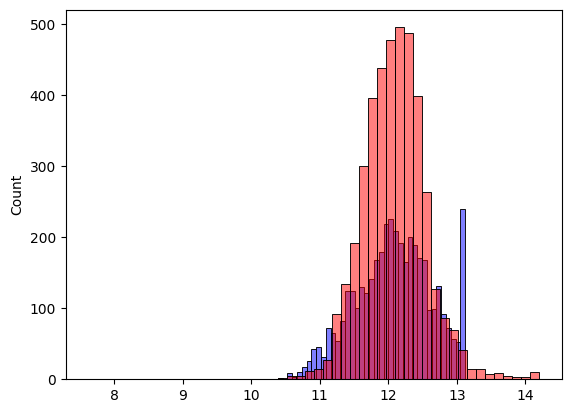

In [28]:


x_train = prepare_x(df_train,fill_na_with = 0)
x_val = prepare_x(df_val,fill_na_with = 0)

w_0,w = train_linear_regression(x_train,y_train)

y_pred = w_0 + x_val.dot(w)

rmse(y_val,y_pred)




sns.histplot(y_val,bins = 50,alpha = 0.5,color = 'blue')
sns.histplot(y_pred, bins =50, alpha=0.5, color = 'red')

* Not really big difference between when replacing missign values in `total_bedrooms` with mean or 0s

## Trying regularization

     0 0.35187
 1e-06 0.35187
0.0001 0.35187
 0.001 0.35186
  0.01 0.35186
   0.1 0.35194
     1 0.35530
     5 0.36000
    10 0.36117


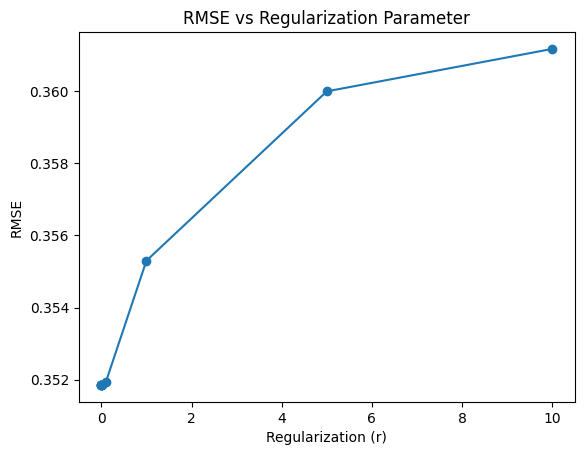

In [29]:
# testing with differen regularization values
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
rmse_values = []

for r in r_values:
    w_0, w = train_linear_regression_reg(x_train, y_train, r=r)
    y_pred = w_0 + x_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    rmse_values.append(rmse_val)
    print('%06s %0.5f' % (r, rmse_val))

# Plotting the RMSE vs Regularization parameter
plt.plot(r_values, rmse_values, marker='o')
plt.xlabel('Regularization (r)')
plt.ylabel('RMSE')
plt.title('RMSE vs Regularization Parameter')
# plt.xscale('log')
plt.show()



0 seems to be the optimal here i.e no regularization needed.

# checking the rmse with different seed number

0 0.33884304805303905
1 0.3362387255954963
2 0.33209123188372097
3 0.3405153609033999
4 0.338902406657164
5 0.3434866725720328
6 0.34519809531003354
7 0.3395989927410697
8 0.3466230873174177
9 0.3365926124170717


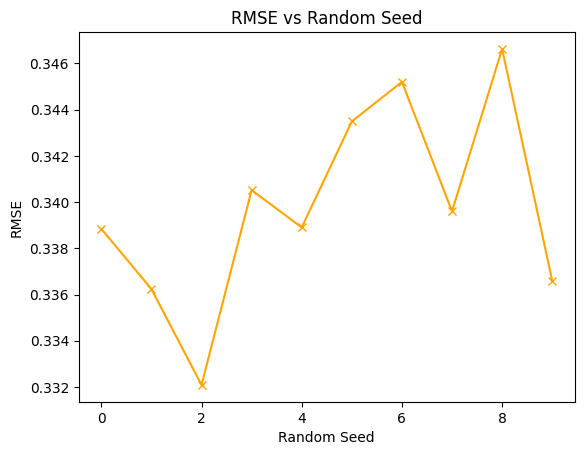

In [30]:

rmses = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    y_train = np.log1p(y_train_orig)
    y_val = np.log1p(y_val_orig)
    y_test = np.log1p(y_test_orig)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_x(df_train, fill_na_with=0)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_x(df_val, fill_na_with=0)
    y_pred = w_0 + X_val.dot(w)

    result = rmse(y_val, y_pred)
    print(s, result)
    
    rmses.append(result)
    
# Plotting the RMSE vs Regularization parameter
plt.plot(range(10), rmses, marker='x',color='orange')
plt.xlabel('Random Seed')
plt.ylabel('RMSE')
plt.title('RMSE vs Random Seed')
plt.show()


Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [31]:
np.std(rmses)

np.float64(0.004170771946572253)

# looking at rmse with test data

In [32]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.seed(2) # seened to have th least rmse
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

In [33]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [34]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_x(df_full_train, fill_na_with=0)
y_full_train = np.concatenate([y_train, y_val])
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_x(df_test, fill_na_with=0)
y_pred = w_0 + X_test.dot(w)

result = rmse(y_test, y_pred)
print(result,end = "\n\n")
print(w_0,end = "\n\n")
print(w, end = "\n\n")

0.3480830391854412

-11.777114174540074

[-2.76751716e-01 -2.81976520e-01  3.30029293e-03 -2.15139202e-05
  2.42422610e-04 -1.77641418e-04  4.63769406e-04  1.73973154e-01]



# saving the best parameters for the trained model

In [35]:
w_0

np.float64(-11.777114174540074)

In [36]:
w

array([-2.76751716e-01, -2.81976520e-01,  3.30029293e-03, -2.15139202e-05,
        2.42422610e-04, -1.77641418e-04,  4.63769406e-04,  1.73973154e-01])

In [37]:


# Save the model parameters (w_0 and w)
trained_model = {
    'w_0': w_0,
    'w': w
}

# Save the trained model to a file in the current working directory
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(trained_model, f)

print("Trained model saved successfully!")

Trained model saved successfully!


In [38]:
# Load the saved model
with open('trained_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Extract the saved weights
w_0 = loaded_model['w_0']
w = loaded_model['w']

# Now you can use the loaded model to make predictions
X_test = prepare_x(df_test, fill_na_with=0)
y_pred = w_0 + X_test.dot(w)

# Compute RMSE or make predictions
result = rmse(y_test, y_pred)
print("Loaded model RMSE:", result)


Loaded model RMSE: 0.3480830391854412


# generating a prediction on the loaded model

In [39]:
# if you want to generate a prediction based on the 8 features provided from the list
'''
features = [
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. dfMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
]

'''
new_features = [
    37.88,
    -122.23,
    25,
    3,
    1,
    50,
    5,
    70000
    
]


# predicting a house median value from the test data
new_features = df_test.iloc[1,:]
print(new_features)
print("\n")
# Prepare the input as a DataFrame (ensure it aligns with your feature columns)
new_features_prepared = prepare_x(pd.DataFrame([new_features]), fill_na_with=0)



# Predict using the loaded model parameters (w_0 and w)
y_pred_new = w_0 + new_features_prepared.dot(w)

# Reverse the log transformation (if it was used during training)
predicted_value = np.expm1(y_pred_new)

print("Predicted value (in original scale):", np.round(predicted_value,2))


longitude             -117.000
latitude                32.850
housing_median_age      24.000
total_rooms           1888.000
total_bedrooms         319.000
population             950.000
households             319.000
median_income            5.282
Name: 1, dtype: float64


Predicted value (in original scale): 1    231870.54
dtype: float64
